# Movie Genre Classification Project

Aim : To determine the genre of a movie from its plot. 

## Introduction

## Data Source 

https://www.kaggle.com/jrobischon/wikipedia-movie-plots

<h3>Context</h3>

<p>Plot summary descriptions scraped from Wikipedia</p>

<h3>Content</h3>

<p>The dataset contains descriptions of 34,886 movies from around the world. Column descriptions are listed below:</p>

<ul>
	<li><em>Release Year</em>&nbsp;- Year in which the movie was released</li>
	<li><em>Title</em>&nbsp;- Movie title</li>
	<li><em>Origin/Ethnicity</em>&nbsp;- Origin of movie (i.e. American, Bollywood, Tamil, etc.)</li>
	<li><em>Director</em>&nbsp;- Director(s)</li>
	<li><em>Plot</em>&nbsp;- Main actor and actresses</li>
	<li><em>Genre</em>&nbsp;- Movie Genre(s)</li>
	<li><em>Wiki Page</em>&nbsp;- URL of the Wikipedia page from which the plot description was scraped</li>
	<li><em>Plot</em>&nbsp;- Long form description of movie plot (WARNING: May contain spoilers!!!)<br />
	&nbsp;</li>
</ul>


## Exploratory Data Analysis

In this section we will try to conduct data exploration for learn about the feature that the data set has to offer.

## Installing Libraries

In [1]:
#!pip install textblob
#!pip install pandas-profiling
#!pip install nltk

### Importing Libraries

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pandas_profiling

import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC


# from textblob import TextBlob

## Importing Data

In [3]:
df = pd.read_csv('data/wiki_movie_plots_deduped.csv')
df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [4]:
df.shape

(34886, 8)

In [5]:
df.describe()

,Release Year
count,34886.000000
mean,1981.314252
std,27.815174
min,1901.000000
25%,1957.000000
50%,1988.000000
75%,2007.000000
max,2017.000000


In [6]:
pandas_profiling.ProfileReport(df)

In [7]:
print(df['Genre'].count())

34886


## Data Correction

### Harmonization of Genre Column

From the above profiling we have seen that the column in genre is highly irregular, there are spelling mistakes and genre correction which needs to be done

In [8]:
movies = df

In [9]:
# harmonization
movies['GenreCorrected'] =movies['Genre'] 
movies['GenreCorrected']=movies['GenreCorrected'].str.strip()
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' - ', '|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' / ', '|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('/', '|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' & ', '|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(', ', '|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('; ', '|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('bio-pic', 'biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biopic', 'biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biographical', 'biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biodrama', 'biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('bio-drama', 'biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biographic', 'biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(film genre\)', '')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('animated','animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('anime','animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('children\'s','children')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('comedey','comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\[not in citation given\]','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' set 4,000 years ago in the canadian arctic','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('historical','history')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('romantic','romance')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('3-d','animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('3d','animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('viacom 18 motion pictures','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('sci-fi','science_fiction')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('ttriller','thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('.','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('based on radio serial','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' on the early years of hitler','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('sci fi','science_fiction')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('science fiction','science_fiction')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' (30min)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('16 mm film','short')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\[140\]','drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\[144\]','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' for ','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('adventures','adventure')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('kung fu','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('kung-fu','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('martial arts','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('world war ii','war')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('world war i','war')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biography about montreal canadiens star|maurice richard','biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('bholenath movies|cinekorn entertainment','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(volleyball\)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('spy film','spy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('anthology film','anthology')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biography fim','biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('avant-garde','avant_garde')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biker film','biker')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('buddy cop','buddy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('buddy film','buddy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('comedy 2-reeler','comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('films','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('film','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biography of pioneering american photographer eadweard muybridge','biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('british-german co-production','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('bruceploitation','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('comedy-drama adaptation of the mordecai richler novel','comedy-drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('movies by the mob\|knkspl','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('movies','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('movie','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('coming of age','coming_of_age')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('coming-of-age','coming_of_age')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('drama about child soldiers','drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('(( based).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('(( co-produced).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('(( adapted).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('(( about).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('musical b','musical')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('animationchildren','animation|children')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' period','period')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('drama loosely','drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(aquatics|swimming\)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(aquatics|swimming\)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace("yogesh dattatraya gosavi's directorial debut \[9\]",'')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace("war-time","war")
movies['GenreCorrected']=movies['GenreCorrected'].str.replace("wartime","war")
movies['GenreCorrected']=movies['GenreCorrected'].str.replace("ww1","war")
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('unknown','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace("wwii","war")
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('psychological','psycho')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('rom-coms','romance')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('true crime','crime')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|007','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('slice of life','slice_of_life')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('computer animation','animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('gun fu','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('j-horror','horror')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(shogi|chess\)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('afghan war drama','war drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|6 separate stories','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(30min\)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' (road bicycle racing)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' v-cinema','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('tv miniseries','tv_miniseries')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|docudrama','\|documentary|drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' in animation','|animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('((adaptation).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('((adaptated).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('((adapted).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('(( on ).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('american football','sports')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dev\|nusrat jahan','sports')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('television miniseries','tv_miniseries')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(artistic\)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \|direct-to-dvd','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('history dram','history drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('martial art','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('psycho thriller,','psycho thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|1 girl\|3 suitors','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(road bicycle racing\)','')
filterE = movies['GenreCorrected']=="ero"
movies.loc[filterE,'GenreCorrected']="adult"
filterE = movies['GenreCorrected']=="music"
movies.loc[filterE,'GenreCorrected']="musical"
filterE = movies['GenreCorrected']=="-"
movies.loc[filterE,'GenreCorrected']=''
filterE = movies['GenreCorrected']=="comedy–drama"
movies.loc[filterE,'GenreCorrected'] = "comedy|drama"
filterE = movies['GenreCorrected']=="comedy–horror"
movies.loc[filterE,'GenreCorrected'] = "comedy|horror"
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' ','|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(',','|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('-','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actionadventure','action|adventure')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actioncomedy','action|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actiondrama','action|drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actionlove','action|love')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actionmasala','action|masala')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actionchildren','action|children')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('fantasychildren\|','fantasy|children')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('fantasycomedy','fantasy|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('fantasyperiod','fantasy|period')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('cbctv_miniseries','tv_miniseries')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dramacomedy','drama|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dramacomedysocial','drama|comedy|social')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dramathriller','drama|thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('comedydrama','comedy|drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dramathriller','drama|thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('comedyhorror','comedy|horror')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('sciencefiction','science_fiction')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('adventurecomedy','adventure|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('animationdrama','animation|drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|\|','|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('muslim','religious')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('thriler','thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('crimethriller','crime|thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('fantay','fantasy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actionthriller','action|thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('comedysocial','comedy|social')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('martialarts','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|\(children\|poker\|karuta\)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('epichistory','epic|history')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('erotica','adult')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('erotic','adult')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('((\|produced\|).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('chanbara','chambara')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('comedythriller','comedy|thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biblical','religious')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biblical','religious')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('colour\|yellow\|productions\|eros\|international','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|directtodvd','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('liveaction','live|action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('melodrama','drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('superheroes','superheroe')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('gangsterthriller','gangster|thriller')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('heistcomedy','comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('heist','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('historic','history')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('historydisaster','history|disaster')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('warcomedy','war|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('westerncomedy','western|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('ancientcostume','costume')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('computeranimation','animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dramatic','drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('familya','family')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('familya','family')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dramedy','drama|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dramaa','drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('famil\|','family')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('superheroe','superhero')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biogtaphy','biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('devotionalbiography','devotional|biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('docufiction','documentary|fiction')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('familydrama','family|drama')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('espionage','spy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('supeheroes','superhero')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('romancefiction','romance|fiction')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('horrorthriller','horror|thriller')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('suspensethriller','suspense|thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('musicaliography','musical|biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('triller','thriller')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|\(fiction\)','|fiction')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('romanceaction','romance|action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('romancecomedy','romance|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('romancehorror','romance|horror')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('romcom','romance|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('rom\|com','romance|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('satirical','satire')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('science_fictionchildren','science_fiction|children')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('homosexual','adult')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('sexual','adult')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('mockumentary','documentary')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('periodic','period')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('romanctic','romantic')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('politics','political')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('samurai','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('tv_miniseries','series')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('serial','series')

filterE = movies['GenreCorrected']=="musical–comedy"
movies.loc[filterE,'GenreCorrected'] = "musical|comedy"

filterE = movies['GenreCorrected']=="roman|porno"
movies.loc[filterE,'GenreCorrected'] = "adult"


filterE = movies['GenreCorrected']=="action—masala"
movies.loc[filterE,'GenreCorrected'] = "action|masala"


filterE = movies['GenreCorrected']=="horror–thriller"
movies.loc[filterE,'GenreCorrected'] = "horror|thriller"

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('family','children')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('martial_arts','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('horror','thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('war','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('adventure','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('science_fiction','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('western','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('western','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('noir','black')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('spy','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('superhero','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('social','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('suspense','action')


filterE = movies['GenreCorrected']=="drama|romance|adult|children"
movies.loc[filterE,'GenreCorrected'] = "drama|romance|adult"

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|–\|','|')
movies['GenreCorrected']=movies['GenreCorrected'].str.strip(to_strip='\|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actionner','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.strip()

In [10]:
movies['Count']=1
movies[['GenreCorrected','Count']].groupby(['GenreCorrected'],as_index=False).count().sort_values(['Count'], ascending=False).head(10)

,GenreCorrected,Count
0,,6206
516,drama,6107
359,comedy,4411
2,action,3790
1111,thriller,2163
964,romance,954
203,animation,601
973,romance|comedy,577
447,crime,573
387,comedy|drama,560


In [11]:
movies['GenreSplit']=movies['GenreCorrected'].str.split('|')
movies['GenreSplit']= movies['GenreSplit'].apply(np.sort).apply(np.unique)

In [12]:
genres_array = np.array([])

for i in range(0,movies.shape[0]-1):
    genres_array = np.concatenate((genres_array, movies['GenreSplit'][i] ))
    
genres_array

array(['', '', '', ..., 'comedy', 'comedy', 'romance'], dtype='<U32')

In [13]:
genres = pd.DataFrame({'Genre':genres_array})

In [14]:
genres['Count']=1
genres[['Genre','Count']].groupby(['Genre'], as_index=False).sum().sort_values(['Count'], ascending=False).head(10)

,Genre,Count
116,drama,9487
85,comedy,7320
0,,6222
4,action,5952
426,thriller,3291
337,romance,2639
94,crime,1607
244,musical,951
16,animation,914
73,children,684


In [15]:
genres=genres[['Genre','Count']].groupby(['Genre'], as_index=False).sum().sort_values(['Count'], ascending=False)

In [16]:
genres = genres[genres['Genre']!='']
genres.head(25)

,Genre,Count
116,drama,9487
85,comedy,7320
4,action,5952
426,thriller,3291
337,romance,2639
94,crime,1607
244,musical,951
16,animation,914
73,children,684
131,fantasy,542


In [17]:
TotalCountGenres=sum(genres['Count'])
TotalCountGenres

37321

In [18]:
genres['Frequency'] = genres['Count']/TotalCountGenres

In [19]:
genres['CumulativeFrequency'] = genres['Frequency'].cumsum()

In [20]:
genres.head(20)

,Genre,Count,Frequency,CumulativeFrequency
116,drama,9487,0.254200,0.254200
85,comedy,7320,0.196136,0.450336
4,action,5952,0.159481,0.609818
426,thriller,3291,0.088181,0.697998
337,romance,2639,0.070711,0.768709
94,crime,1607,0.043059,0.811768
244,musical,951,0.025482,0.837250
16,animation,914,0.024490,0.861740
73,children,684,0.018327,0.880068
131,fantasy,542,0.014523,0.894590


Selecting CF <=.957

In [21]:
np.array(genres[genres['CumulativeFrequency']<=.957]['Genre'])

array(['drama', 'comedy', 'action', 'thriller', 'romance', 'crime',
       'musical', 'animation', 'children', 'fantasy', 'mystery',
       'biography', 'black', 'history', 'short', 'documentary', 'sports',
       'series', 'adult', 'political'], dtype=object)

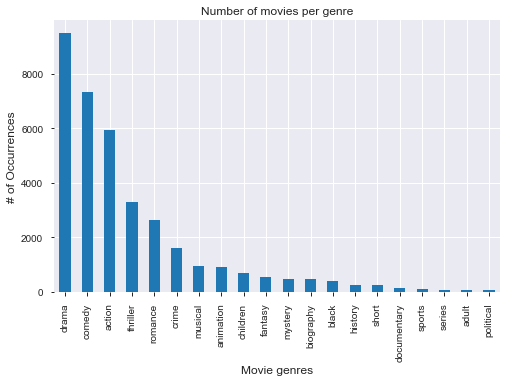

In [22]:
genres[genres['CumulativeFrequency']<=.957][['Genre','Count']].plot(x='Genre', y='Count', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of movies per genre")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Movie genres', fontsize=12)
plt.show()

In [23]:
mainGenres=np.array(genres[genres['CumulativeFrequency']<=.957]['Genre'])

In [24]:
arr1=np.array(['adult', 'romance', 'drama','and'])
arr1[np.in1d(arr1,mainGenres)] # genres not in the mainGenres array will be deleted

array(['adult', 'romance', 'drama'], dtype='<U7')

In [25]:
movies['GenreSplit'][10:12].apply(lambda x: x[np.in1d(x,mainGenres)])

10                   [short]
11    [action, crime, short]
Name: GenreSplit, dtype: object

In [26]:
movies['GenreSplitMain'] = movies['GenreSplit'].apply(lambda x: x[np.in1d(x,mainGenres)])

In [27]:
movies[['GenreSplitMain','GenreSplit','Genre']][200:220]

,GenreSplitMain,GenreSplit,Genre
200,[drama],[drama],drama
201,[drama],[drama],drama
202,[comedy],[comedy],comedy
203,[drama],[drama],drama
204,[comedy],[comedy],comedy
205,"[comedy, drama]","[comedy, drama]",comedy drama
206,[mystery],[mystery],mystery
207,[drama],[drama],drama
208,[drama],[drama],drama
209,"[comedy, drama]","[comedy, drama]",comedy drama


In [28]:
#movies['PlotClean'] = movies['Plot'].apply(correctSpelling)

In [29]:
movies['MainGenresCount'] = movies['GenreSplitMain'].apply(len)
max(movies['MainGenresCount'] )

7

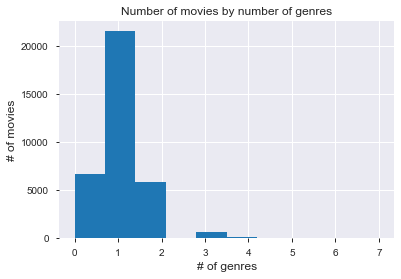

In [30]:
movies['MainGenresCount'].hist()

plt.title("Number of movies by number of genres")
plt.ylabel('# of movies', fontsize=12)
plt.xlabel('# of genres', fontsize=12)
plt.show()

In [31]:
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None)

In [32]:
movies.GenreSplitMain[6:15].apply(lambda x: '-'.join(x)).str.split(pat='-',n=5,expand=True)

,0,1,2
6,action,None,None
7,comedy,None,None
8,,None,None
9,,None,None
10,short,None,None
11,action,crime,short
12,short,None,None
13,biography,None,None
14,comedy,None,None


In [33]:
movies.GenreSplitMain[6:15].apply(lambda x: '-'.join(x)).str.get_dummies(sep='-')

,action,biography,comedy,crime,short
6,1,0,0,0,0
7,0,0,1,0,0
8,0,0,0,0,0
9,0,0,0,0,0
10,0,0,0,0,1
11,1,0,0,1,1
12,0,0,0,0,1
13,0,1,0,0,0
14,0,0,1,0,0


In [34]:
movies.GenreSplitMain[6:15]

6                   [action]
7                   [comedy]
8                         []
9                         []
10                   [short]
11    [action, crime, short]
12                   [short]
13               [biography]
14                  [comedy]
Name: GenreSplitMain, dtype: object

In [35]:
movies.columns

Index(['Release_Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast',
       'Genre', 'Wiki_Page', 'Plot', 'GenreCorrected', 'Count', 'GenreSplit',
       'GenreSplitMain', 'MainGenresCount'],
      dtype='object')

In [36]:
movies.shape

(34886, 13)

In [37]:
# the title is not unique
len(movies.Title.unique())

32432

In [38]:
# The number of movies not having a genre
movies[movies.GenreCorrected==''].shape

(6206, 13)

# Natural Language Processing on Plot Column

Natural language processing (NLP) is a subfield of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.

## Text blob Processing steps

### 1. Converting to lower case

In [39]:
movies['Plot'].apply(lambda x : str.lower(x))[:5]

0    a bartender is working at a saloon, serving dr...
1    the moon, painted with a smiling face hangs ov...
2    the film, just over a minute long, is composed...
3    lasting just 61 seconds and consisting of two ...
4    the earliest known adaptation of the classic f...
Name: Plot, dtype: object

In [40]:
movies['Plot_correction'] = movies['Plot'].apply(lambda x : str.lower(x))

### 2. Removing Stop words

In [41]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re
import nltk

In [42]:
dir(nltk)[:10]

['AbstractLazySequence',
 'AffixTagger',
 'AlignedSent',
 'Alignment',
 'AnnotationTask',
 'ApplicationExpression',
 'Assignment',
 'BigramAssocMeasures',
 'BigramCollocationFinder',
 'BigramTagger']

In [43]:
stopwords = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

In [44]:
def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

In [45]:
movies['Plot_correction'] = movies['Plot_correction'].apply(lambda x: clean_text(x))

In [46]:
movies['Plot_correction']

0        [bartender, working, saloon, serving, drinks, ...
1        [moon, painted, smiling, face, hangs, park, ni...
2        [film, minute, long, composed, two, shots, fir...
3        [lasting, 61, seconds, consisting, two, shots,...
4        [earliest, known, adaptation, classic, fairyta...
                               ...                        
34881    [film, begins, 1919, world, war, ended, centre...
34882    [two, musicians, salih, gürkan, described, adv...
34883    [zafer, sailor, living, mother, döndü, coastal...
34884    [film, centres, around, young, woman, named, a...
34885    [writer, orhan, şahin, returns, stanbul, many,...
Name: Plot_correction, Length: 34886, dtype: object

In [47]:
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

In [48]:
movies['Plot_correction'] = movies['Plot_correction'].apply(lambda x: lemmatizing(x))

In [49]:
movies['Plot_correction'] =  movies['Plot_correction'].apply(lambda x: " ".join(str(k) for k in x))

In [50]:
movies['Plot_correction']

0        bartender working saloon serving drink custome...
1        moon painted smiling face hang park night youn...
2        film minute long composed two shot first girl ...
3        lasting 61 second consisting two shot first sh...
4        earliest known adaptation classic fairytale fi...
                               ...                        
34881    film begin 1919 world war ended centre around ...
34882    two musician salih gürkan described adventure ...
34883    zafer sailor living mother döndü coastal villa...
34884    film centre around young woman named amy tyler...
34885    writer orhan şahin return stanbul many year he...
Name: Plot_correction, Length: 34886, dtype: object

# Building the classification algorithms

Steps to be done:

- Building the classes: one dummy variable for each genre. In this final project, there are 20 genres of movies.
- Split the data in Train and Test
- Building the features based on TfidfVectorize

In [51]:
movies['GenreSplit']

0                       []
1                       []
2                       []
3                       []
4                       []
               ...        
34881                   []
34882             [comedy]
34883             [comedy]
34884    [comedy, romance]
34885            [romance]
Name: GenreSplit, Length: 34886, dtype: object

In [52]:
mainGenres

array(['drama', 'comedy', 'action', 'thriller', 'romance', 'crime',
       'musical', 'animation', 'children', 'fantasy', 'mystery',
       'biography', 'black', 'history', 'short', 'documentary', 'sports',
       'series', 'adult', 'political'], dtype=object)

In [53]:
movies['GenreSplit'] = movies['GenreSplit'].apply(lambda x: x if x in mainGenres else None)

C:\Users\sreer\AppData\Local\conda\conda\envs\ds2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


In [54]:
movies['GenreSplit'] 

0             None
1             None
2             None
3             None
4             None
           ...    
34881         None
34882     [comedy]
34883     [comedy]
34884         None
34885    [romance]
Name: GenreSplit, Length: 34886, dtype: object

In [55]:
movies.dropna(subset=['GenreSplit'], inplace=True)

In [56]:
movies['GenreSplit']

6           [action]
7           [comedy]
10           [short]
12           [short]
13       [biography]
            ...     
34876        [drama]
34877        [drama]
34882       [comedy]
34883       [comedy]
34885      [romance]
Name: GenreSplit, Length: 21009, dtype: object

In [57]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(movies['GenreSplit'])

# transform target variable
y = multilabel_binarizer.transform(movies['GenreSplit'])

In [58]:
multilabel_binarizer.classes_

array(['action', 'adult', 'animation', 'biography', 'black', 'children',
       'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'history',
       'musical', 'mystery', 'political', 'romance', 'series', 'short',
       'sports', 'thriller'], dtype=object)

In [59]:
tfidf_vectorizer = TfidfVectorizer(stop_words ='english', smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')

In [60]:
xtrain, xval, ytrain, yval = train_test_split(movies['Plot_correction'], y, test_size=0.2, random_state=9)

In [61]:
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score

In [63]:
lr = LogisticRegression()
clf_lr = OneVsRestClassifier(lr, n_jobs=-1)
clf_lr.fit(xtrain_tfidf, ytrain)
y_pred_lr = clf_lr.predict(xval_tfidf)

In [64]:
result_lr = {}
for x,q in enumerate(multilabel_binarizer.classes_):
    k = [[i[x]] for i in yval]
    l = [[i[x]] for i in y_pred_lr]
    result_lr[q] = f1_score(k, l, average="micro")
result_lr_df = pd.DataFrame(list(result_lr.items()), columns=['Genre', 'f1_score'])
result_lr_df['classifier'] = 'LogisticRegression'
result_lr_df

,Genre,f1_score,classifier
0,action,0.861495,LogisticRegression
1,adult,0.998572,LogisticRegression
2,animation,0.980961,LogisticRegression
3,biography,0.987863,LogisticRegression
4,black,0.983341,LogisticRegression
5,children,0.986197,LogisticRegression
6,comedy,0.825083,LogisticRegression
7,crime,0.970014,LogisticRegression
8,documentary,0.994288,LogisticRegression
9,drama,0.715612,LogisticRegression


In [65]:
mnb = MultinomialNB(fit_prior=True, class_prior=None)
clf_mnb = OneVsRestClassifier(mnb, n_jobs=-1)
clf_mnb.fit(xtrain_tfidf, ytrain)
y_pred_mnb = clf_mnb.predict(xval_tfidf)

In [66]:
result_mnb = {}
for x,q in enumerate(multilabel_binarizer.classes_):
    k = [[i[x]] for i in yval]
    l = [[i[x]] for i in y_pred_mnb]
    result_mnb[q] = f1_score(k, l, average="micro")
result_mnb_df = pd.DataFrame(list(result_mnb.items()), columns=['Genre', 'f1_score'])
result_mnb_df['classifier'] = 'MultinomialNB'
result_mnb_df

,Genre,f1_score,classifier
0,action,0.849833,MultinomialNB
1,adult,0.998096,MultinomialNB
2,animation,0.977630,MultinomialNB
3,biography,0.981437,MultinomialNB
4,black,0.974060,MultinomialNB
5,children,0.983341,MultinomialNB
6,comedy,0.780343,MultinomialNB
7,crime,0.956449,MultinomialNB
8,documentary,0.990957,MultinomialNB
9,drama,0.701095,MultinomialNB


In [67]:
lsvc = LinearSVC()
clf_lsvc = OneVsRestClassifier(lsvc, n_jobs=-1)
clf_lsvc.fit(xtrain_tfidf, ytrain)
y_pred_lsvc = clf_lsvc.predict(xval_tfidf)

In [68]:
result_lsvc  = {}
for x,q in enumerate(multilabel_binarizer.classes_):
    k = [[i[x]] for i in yval]
    l = [[i[x]] for i in y_pred_lsvc]
    result_lsvc[q] = f1_score(k, l, average="micro")
result_lsvc_df = pd.DataFrame(list(result_lsvc.items()), columns=['Genre', 'f1_score'])
result_lsvc_df['classifier'] = 'LinearSVC'
result_lsvc_df

,Genre,f1_score,classifier
0,action,0.844598,LinearSVC
1,adult,0.998572,LinearSVC
2,animation,0.978344,LinearSVC
3,biography,0.987149,LinearSVC
4,black,0.978820,LinearSVC
5,children,0.984531,LinearSVC
6,comedy,0.800095,LinearSVC
7,crime,0.960019,LinearSVC
8,documentary,0.994288,LinearSVC
9,drama,0.692527,LinearSVC


In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
clf_dtc = DecisionTreeClassifier(random_state=0)
clf_dtc.fit(xtrain_tfidf, ytrain)
y_pred_dtc = clf_dtc.predict(xval_tfidf)

In [71]:
result_dtc  = {}
for x,q in enumerate(multilabel_binarizer.classes_):
    k = [[i[x]] for i in yval]
    l = [[i[x]] for i in y_pred_dtc]
    result_dtc[q] = f1_score(k, l, average="micro")
result_dtc_df = pd.DataFrame(list(result_dtc.items()), columns=['Genre', 'f1_score'])
result_dtc_df['classifier'] = 'DecisionTreeClassifier'
result_dtc_df

,Genre,f1_score,classifier
0,action,0.788672,DecisionTreeClassifier
1,adult,0.998334,DecisionTreeClassifier
2,animation,0.967872,DecisionTreeClassifier
3,biography,0.983817,DecisionTreeClassifier
4,black,0.975012,DecisionTreeClassifier
5,children,0.983103,DecisionTreeClassifier
6,comedy,0.725131,DecisionTreeClassifier
7,crime,0.954069,DecisionTreeClassifier
8,documentary,0.993099,DecisionTreeClassifier
9,drama,0.650405,DecisionTreeClassifier


In [72]:
comp = pd.concat([result_lsvc_df, result_mnb_df,result_lr_df, result_dtc_df], ignore_index=True)
comp

,Genre,f1_score,classifier
0,action,0.844598,LinearSVC
1,adult,0.998572,LinearSVC
2,animation,0.978344,LinearSVC
3,biography,0.987149,LinearSVC
4,black,0.978820,LinearSVC
5,children,0.984531,LinearSVC
6,comedy,0.800095,LinearSVC
7,crime,0.960019,LinearSVC
8,documentary,0.994288,LinearSVC
9,drama,0.692527,LinearSVC


In [73]:
comp.sort_values('f1_score').drop_duplicates(['Genre'],keep='last')

,Genre,f1_score,classifier
49,drama,0.715612,LogisticRegression
46,comedy,0.825083,LogisticRegression
40,action,0.861495,LogisticRegression
59,thriller,0.910043,LogisticRegression
55,romance,0.951452,LogisticRegression
47,crime,0.970014,LogisticRegression
52,musical,0.976202,LogisticRegression
42,animation,0.980961,LogisticRegression
44,black,0.983341,LogisticRegression
45,children,0.986197,LogisticRegression


[Text(0, 0, 'drama'),
 Text(0, 0, 'comedy'),
 Text(0, 0, 'action'),
 Text(0, 0, 'thriller'),
 Text(0, 0, 'romance'),
 Text(0, 0, 'crime'),
 Text(0, 0, 'musical'),
 Text(0, 0, 'animation'),
 Text(0, 0, 'children'),
 Text(0, 0, 'fantasy'),
 Text(0, 0, 'mystery'),
 Text(0, 0, 'biography'),
 Text(0, 0, 'black'),
 Text(0, 0, 'history'),
 Text(0, 0, 'short'),
 Text(0, 0, 'documentary'),
 Text(0, 0, 'sports'),
 Text(0, 0, 'series'),
 Text(0, 0, 'adult'),
 Text(0, 0, 'political')]

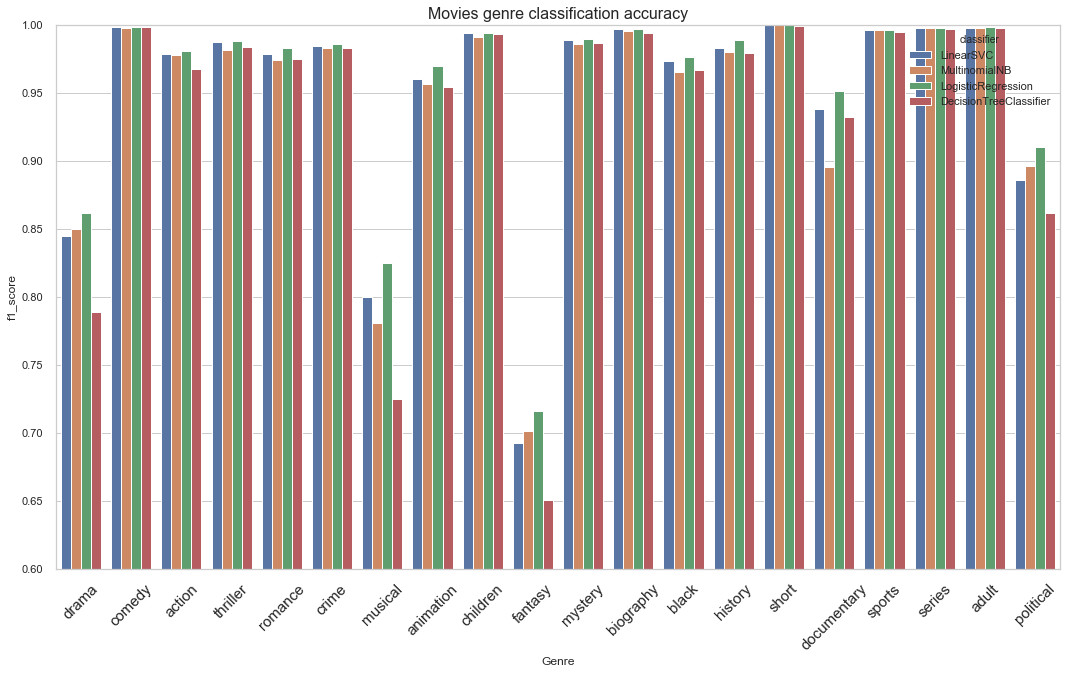

In [74]:
sns.set(rc={'figure.figsize':(18,10)})
sns.set(style="whitegrid")
plt.ylim(.6, 1)
s = sns.barplot(x="Genre", y="f1_score", hue="classifier", data=comp) #.set_title('Movies genre classification accuracy (multinomialNB VS LinearSVC)')
s.set_title('Movies genre classification accuracy', size=16)
s.set_xticklabels(list(mainGenres) ,rotation=45, size=15)

In [75]:
text = '''
Tony Stark, who has inherited the defense contractor Stark Industries from his father, is in war-torn Afghanistan with his friend and military liaison, Lieutenant Colonel James Rhodes, to demonstrate the new "Jericho" missile. After the demonstration, the convoy is ambushed and Stark is critically wounded by a missile used by the attackers: one of his company's own. He is captured and imprisoned in a cave by a terrorist group called the Ten Rings. Yinsen, a fellow captive doctor, implants an electromagnet into Stark's chest to keep the shrapnel shards that wounded him from reaching his heart and killing him. Ten Rings leader Raza offers Stark freedom in exchange for building a Jericho missile for the group, but Tony and Yinsen know that Raza will not keep his word.

Stark and Yinsen secretly build a small, powerful electric generator called an arc reactor to power Stark's electromagnet and a prototypical suit of powered armor to aid in their escape. Although they keep the suit hidden almost to completion, the Ten Rings discover their hostages' intentions and attack the workshop. Yinsen sacrifices himself to divert them while the suit is completed. The armored Stark battles his way out of the cave to find the dying Yinsen, then burns the Ten Rings' weapons in anger and flies away, crashing in the desert and destroying the suit. After being rescued by Rhodes, Stark returns home and announces that his company will cease manufacturing weapons. Obadiah Stane, his father's old partner and the company's manager, advises Stark that this may ruin Stark Industries and his father's legacy. In his home workshop, Stark builds a sleeker, more powerful version of his improvised armor suit as well as a more powerful arc reactor for his chest. Personal assistant Pepper Potts places the original reactor inside a small glass showcase. Though Stane requests details, a suspicious Stark decides to keep his work to himself.

At a charity event held by Stark Industries, reporter Christine Everhart informs Stark that his company's weapons were recently delivered to the Ten Rings and are being used to attack Yinsen's home village, Gulmira. Stark dons his new armor and flies to Afghanistan, where he saves the villagers. While flying home, Stark is attacked by two fighter jets. He reveals his secret identity to Rhodes over the phone in an attempt to end the attack. Meanwhile, the Ten Rings gather the pieces of Stark's prototype suit and meet with Stane, who has been trafficking arms to criminals worldwide and has staged a coup to replace Stark as Stark Industries' CEO by hiring the Ten Rings to kill him. He subdues Raza and has the rest of the group killed. Stane has a massive new suit reverse engineered from the wreckage. Seeking to track his company's illegal shipments, Stark sends Potts to hack into its database. She discovers that Stane hired the Ten Rings to kill Stark, but the group reneged. Potts meets with Agent Phil Coulson of S.H.I.E.L.D., an intelligence agency, to inform him of Stane's activities.

Stane's scientists cannot duplicate Stark's miniaturized arc reactor, so Stane ambushes Stark at his home and takes the one from his chest. Stark manages to get to his original reactor to replace it. Potts and several S.H.I.E.L.D. agents attempt to arrest Stane, but he dons his suit and attacks them. Stark fights Stane but is outmatched without his new reactor to run his suit at full capacity. The fight carries Stark and Stane to the top of the Stark Industries building, and Stark instructs Potts to overload the large arc reactor powering the building. This unleashes a massive electrical surge that causes Stane and his armor to fall into the exploding reactor, killing him. The next day, at a press conference, Stark defies suggestions from S.H.I.E.L.D. and publicly admits to being "Iron Man."

In a post-credits scene, S.H.I.E.L.D. Director Nick Fury visits Stark at home, telling him that Iron Man is not "the only superhero in the world", and explaining that he wants to discuss the "Avenger Initiative".

'''

In [76]:
text = clean_text(text)
text = " ".join(text)

In [77]:
t = tfidf_vectorizer.transform([text])

In [78]:
y_pred_lr = clf_lr.predict(t)
y_pred_lsvc = clf_lsvc.predict(t)
y_pred_mnb = clf_mnb.predict(t)

In [79]:
test = multilabel_binarizer.inverse_transform(y_pred_lr)[0] + multilabel_binarizer.inverse_transform(y_pred_lsvc)[0] + multilabel_binarizer.inverse_transform(y_pred_mnb)[0]
print(set(test))

{'drama', 'action'}


In [80]:
import pickle

In [81]:
pickle.dump(clf_lr, open('lr_classifier.pkl', 'wb'))

In [82]:
pickle.dump(tfidf_vectorizer, open('tfidf_vectorizer.pkl', 'wb'))

In [83]:
pickle.dump(multilabel_binarizer, open('multilabel_binarizer.pkl', 'wb'))

# Keras Embedding and Word2Vec

<h2>1. Word Embedding</h2>

<p>A word embedding is a class of approaches for representing words and documents using a dense vector representation.</p>

<p>It is an improvement over more the traditional bag-of-word model encoding schemes where large sparse vectors were used to represent each word or to score each word within a vector to represent an entire vocabulary. These representations were sparse because the vocabularies were vast and a given word or document would be represented by a large vector comprised mostly of zero values.</p>

<p>Instead, in an embedding, words are represented by dense vectors where a vector represents the projection of the word into a continuous vector space.</p>

<p>The position of a word within the vector space is learned from text and is based on the words that surround the word when it is used.</p>

<p>The position of a word in the learned vector space is referred to as its embedding.</p>

<p>Two popular examples of methods of learning word embeddings from text include:</p>

<ul>
	<li>Word2Vec.</li>
	<li>GloVe.</li>
</ul>

<p>In addition to these carefully designed methods, a word embedding can be learned as part of a deep learning model. This can be a slower approach, but tailors the model to a specific training dataset.</p>
</section>


In [84]:
movies['GenreSplit']

6           [action]
7           [comedy]
10           [short]
12           [short]
13       [biography]
            ...     
34876        [drama]
34877        [drama]
34882       [comedy]
34883       [comedy]
34885      [romance]
Name: GenreSplit, Length: 21009, dtype: object

# Conclusion

In [85]:
movies['Plot_correction']

6        film open two bandit breaking railroad telegra...
7        film family move suburb hoping quiet life thin...
10       rarebit fiend gorge welsh rarebit restaurant l...
12       irish villager kathleen tenant captain clearfi...
13       boone daughter befriends indian maiden boone c...
                               ...                        
34876    film open senegalese boy named khadim told lit...
34877    zeynep lost job weaving factory family mother ...
34882    two musician salih gürkan described adventure ...
34883    zafer sailor living mother döndü coastal villa...
34885    writer orhan şahin return stanbul many year he...
Name: Plot_correction, Length: 21009, dtype: object

<h2>2. Keras Embedding Layer</h2>

<p>Keras offers an&nbsp;<a href="https://keras.io/layers/embeddings/#embedding">Embedding</a>&nbsp;layer that can be used for neural networks on text data.</p>

<p>It requires that the input data be integer encoded, so that each word is represented by a unique integer. This data preparation step can be performed using the&nbsp;<a href="https://keras.io/preprocessing/text/#tokenizer">Tokenizer API</a>&nbsp;also provided with Keras.</p>

<p>The Embedding layer is initialized with random weights and will learn an embedding for all of the words in the training dataset.</p>

<p>It is a flexible layer that can be used in a variety of ways, such as:</p>

<ul>
	<li>It can be used alone to learn a word embedding that can be saved and used in another model later.</li>
	<li>It can be used as part of a deep learning model where the embedding is learned along with the model itself.</li>
	<li>It can be used to load a pre-trained word embedding model, a type of transfer learning.</li>
</ul>

<p>The Embedding layer is defined as the first hidden layer of a network. It must specify 3 arguments:</p>

<p>It must specify 3 arguments:</p>

<ul>
	<li><strong>input_dim</strong>: This is the size of the vocabulary in the text data. For example, if your data is integer encoded to values between 0-10, then the size of the vocabulary would be 11 words.</li>
	<li><strong>output_dim</strong>: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word. For example, it could be 32 or 100 or even larger. Test different values for your problem.</li>
	<li><strong>input_length</strong>: This is the length of input sequences, as you would define for any input layer of a Keras model. For example, if all of your input documents are comprised of 1000 words, this would be 1000.</li>
</ul>

<p>For example, below we define an Embedding layer with a vocabulary of 200 (e.g. integer encoded words from 0 to 199, inclusive), a vector space of 32 dimensions in which words will be embedded, and input documents that have 50 words each.</p>

<table>
	<tbody>
		<tr>
			<td data-settings="show">
			<p>1</p>
			</td>
			<td>
			<p>e = Embedding(200, 32, input_length=50)</p>
			</td>
		</tr>
	</tbody>
</table>

<p>The Embedding layer has weights that are learned. If you save your model to file, this will include weights for the Embedding layer.</p>

<p>The output of the&nbsp;<em>Embedding</em>&nbsp;layer is a 2D vector with one embedding for each word in the input sequence of words (input document).</p>

<p>If you wish to connect a&nbsp;<em>Dense</em>&nbsp;layer directly to an Embedding layer, you must first flatten the 2D output matrix to a 1D vector using the&nbsp;<em>Flatten</em>&nbsp;layer.</p>

<p>Now, let&rsquo;s see how we can use an Embedding layer in practice.</p>


In [86]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

Using TensorFlow backend.


In [87]:
docs = movies['Plot_correction']

In [88]:
labels = y

In [89]:
labels

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [90]:
len(docs[6])

853

In [91]:
vocab_size = 1000
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(20, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
print(model.summary())
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

W0812 10:22:40.880884 14892 deprecation_wrapper.py:119] From C:\Users\sreer\AppData\Local\conda\conda\envs\ds2\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0812 10:22:40.905789 14892 deprecation_wrapper.py:119] From C:\Users\sreer\AppData\Local\conda\conda\envs\ds2\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0812 10:22:40.912770 14892 deprecation_wrapper.py:119] From C:\Users\sreer\AppData\Local\conda\conda\envs\ds2\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0812 10:22:40.952665 14892 deprecation_wrapper.py:119] From C:\Users\sreer\AppData\Local\conda\conda\envs\ds2\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.

Accuracy: 95.226570


In [92]:
from keras.preprocessing.text import Tokenizer

In [93]:
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(docs)

In [94]:
# summarize what was learned
print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)
# integer encode documents
encoded_docs = t.texts_to_matrix(docs, mode='tfidf')
print(encoded_docs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[0.         0.         1.16362225 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.17109717 0.         ... 9.25965421 9.25965421 0.        ]
 [0.         1.17109717 0.         ... 0.         0.         9.25965421]]


In [95]:
vocab_size = 1000
print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 100
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(20, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
print(model.summary())
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

[[0.         0.         1.16362225 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.17109717 0.         ... 9.25965421 9.25965421 0.        ]
 [0.         1.17109717 0.         ... 0.         0.         9.25965421]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 9 9 0]
 [0 0 0 ... 0 0 9]]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 8)            8000      
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 20) 

In [96]:
text

' Tony Stark inherited defense contractor Stark Industries father wartorn Afghanistan friend military liaison Lieutenant Colonel James Rhodes demonstrate new Jericho missile After demonstration convoy ambushed Stark critically wounded missile used attackers one companys He captured imprisoned cave terrorist group called Ten Rings Yinsen fellow captive doctor implants electromagnet Starks chest keep shrapnel shards wounded reaching heart killing Ten Rings leader Raza offers Stark freedom exchange building Jericho missile group Tony Yinsen know Raza keep word Stark Yinsen secretly build small powerful electric generator called arc reactor power Starks electromagnet prototypical suit powered armor aid escape Although keep suit hidden almost completion Ten Rings discover hostages intentions attack workshop Yinsen sacrifices divert suit completed The armored Stark battles way cave find dying Yinsen burns Ten Rings weapons anger flies away crashing desert destroying suit After rescued Rhodes

In [97]:
test_text = t.texts_to_matrix(text, mode='tfidf')
max_length = 100
test_text = pad_sequences(test_text, maxlen=max_length, padding='post')

In [98]:
y_pred_keras = model.predict(test_text)

In [99]:
docs = movies['Plot_correction']

In [100]:
# docs = pd.DataFrame(docs)
# docs.head()

In [101]:
# docs['Plot_correction'] = docs['Plot_correction'].apply(lambda x : str(x.encode(encoding='UTF-8',errors='strict').decode("utf-8") ))
# docs.head()

In [102]:
docs['Plot_correction'].values

KeyError: 'Plot_correction'

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs['Plot_correction'].values)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(docs['Plot_correction'].values)
print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)
# load the whole embedding into memory
embeddings_index = dict()
f = open('glove_6B/glove.6B.300d.txt', encoding="utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))
# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 300))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        

# Spliting data into into train and test
(X_train, X_test, Y_train, Y_test) = train_test_split(padded_docs, labels, test_size=0.2, random_state=1)
# Spliting data from train to train and validate sets
(X_train, X_val, y_train, y_val) = train_test_split(X_train, Y_train, test_size=0.2, random_state=1)



# define model
model = Sequential()
e = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_length, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(20, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
print(model.summary())
# fit the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

In [ ]:
y_pred_keras = model.predict(X_test)

In [ ]:
y_pred.round(decimals=0, out=None)

In [ ]:
padded_docs_test = pad_sequences(test1, maxlen=max_length, padding='post')
padded_docs_test

In [ ]:
y_pred_keras = model.predict(padded_docs_test)

In [ ]:
y_pred.astype(int)

In [ ]:
multilabel_binarizer.inverse_transform(y_pred.round(decimals=0, out=None))

In [ ]:
result_keras  = {}
for x,q in enumerate(multilabel_binarizer.classes_):
    k = [[i[x]] for i in Y_test]
    l = [[i[x]] for i in y_pred_keras.round(decimals=0, out=None)]
    result_keras[q] = f1_score(k, l, average="micro")
result_keras_df = pd.DataFrame(list(result_keras.items()), columns=['Genre', 'f1_score'])
result_keras_df['classifier'] = 'NueralNetworkClassifier'
result_keras_df

In [ ]:
comp = pd.concat([result_lsvc_df, result_mnb_df,result_lr_df, result_dtc_df, result_keras_df], ignore_index=True)
comp.sort_values('f1_score').drop_duplicates(['Genre'],keep='last')

In [ ]:
sns.set(rc={'figure.figsize':(18,10)})
sns.set(style="whitegrid")
plt.ylim(.6, 1)
s = sns.barplot(x="Genre", y="f1_score", hue="classifier", data=comp) #.set_title('Movies genre classification accuracy (multinomialNB VS LinearSVC)')
s.set_title('Movies genre classification accuracy', size=16)
s.set_xticklabels(list(mainGenres) ,rotation=45, size=15)